In [1]:
# Import Library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
# Read data from Local machine 
df=pd.read_csv('C:\\Users\\sonal\\Downloads\\archive\\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Univariate analysis

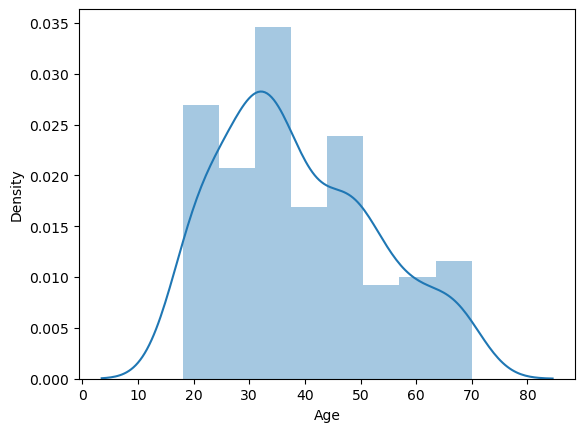

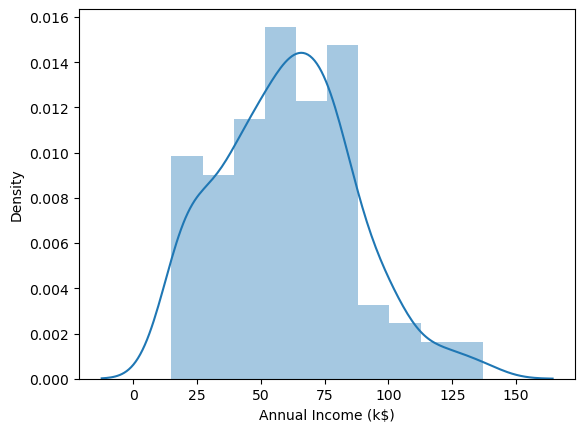

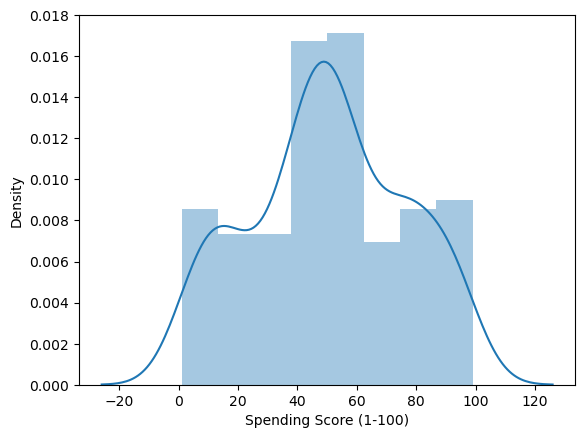

In [5]:
coloumns = [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in coloumns:
    plt.figure()
    sns.distplot(df[i])

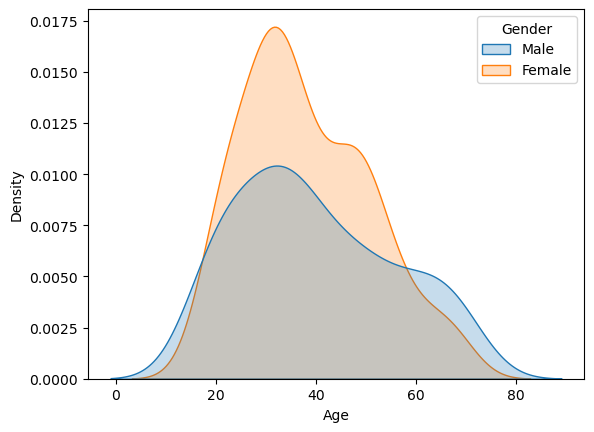

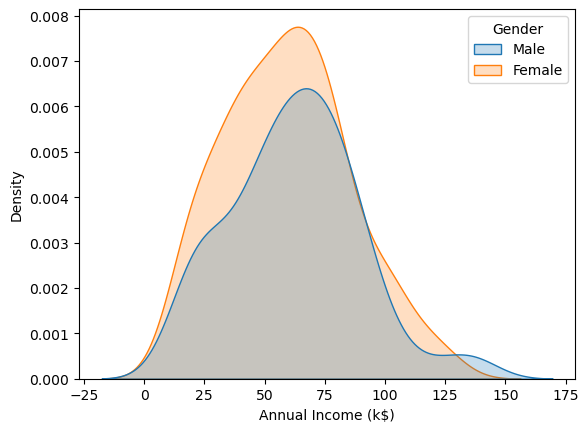

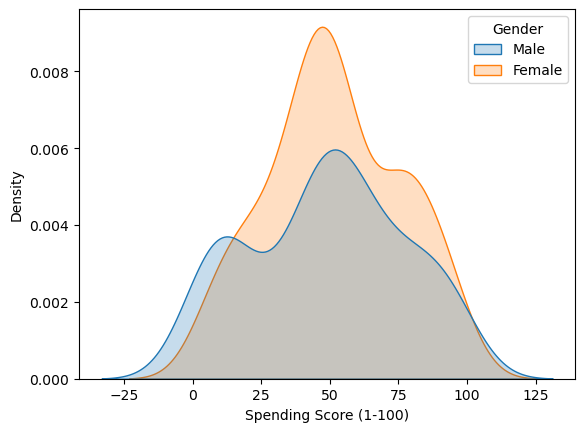

In [6]:
coloumns = [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in coloumns:
    plt.figure()
    sns.kdeplot(df[i], shade= True, hue= df['Gender'])

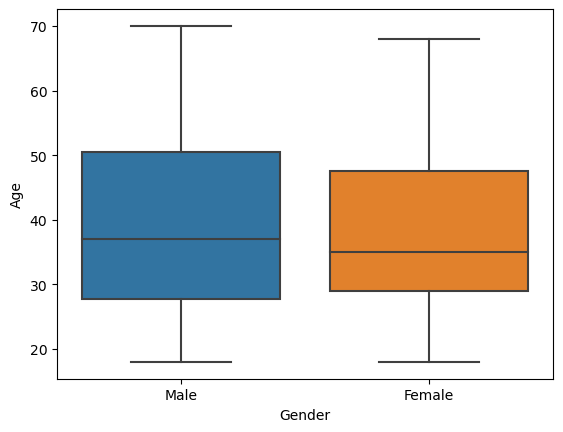

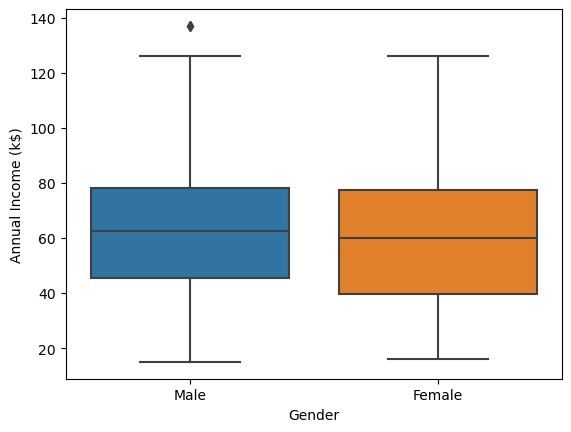

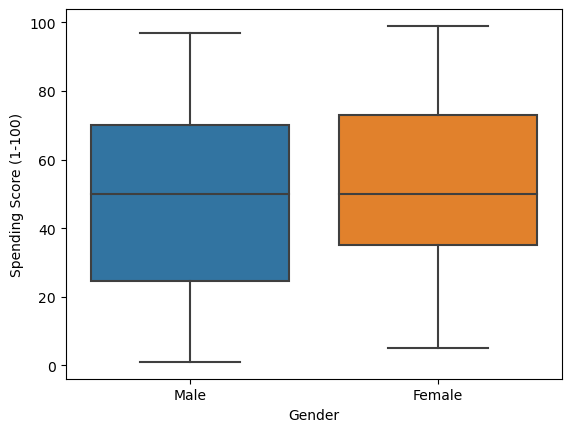

In [7]:
coloumns = [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for f in coloumns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender', y = df[f] )

In [8]:
df['Gender'].value_counts(normalize= True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

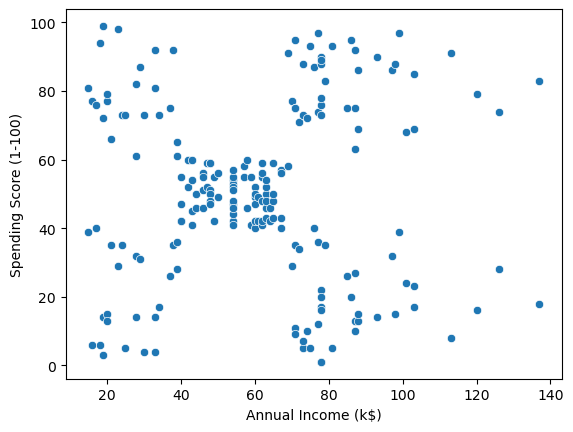

In [9]:
sns.scatterplot(data = df, x= 'Annual Income (k$)', y = 'Spending Score (1-100)' )

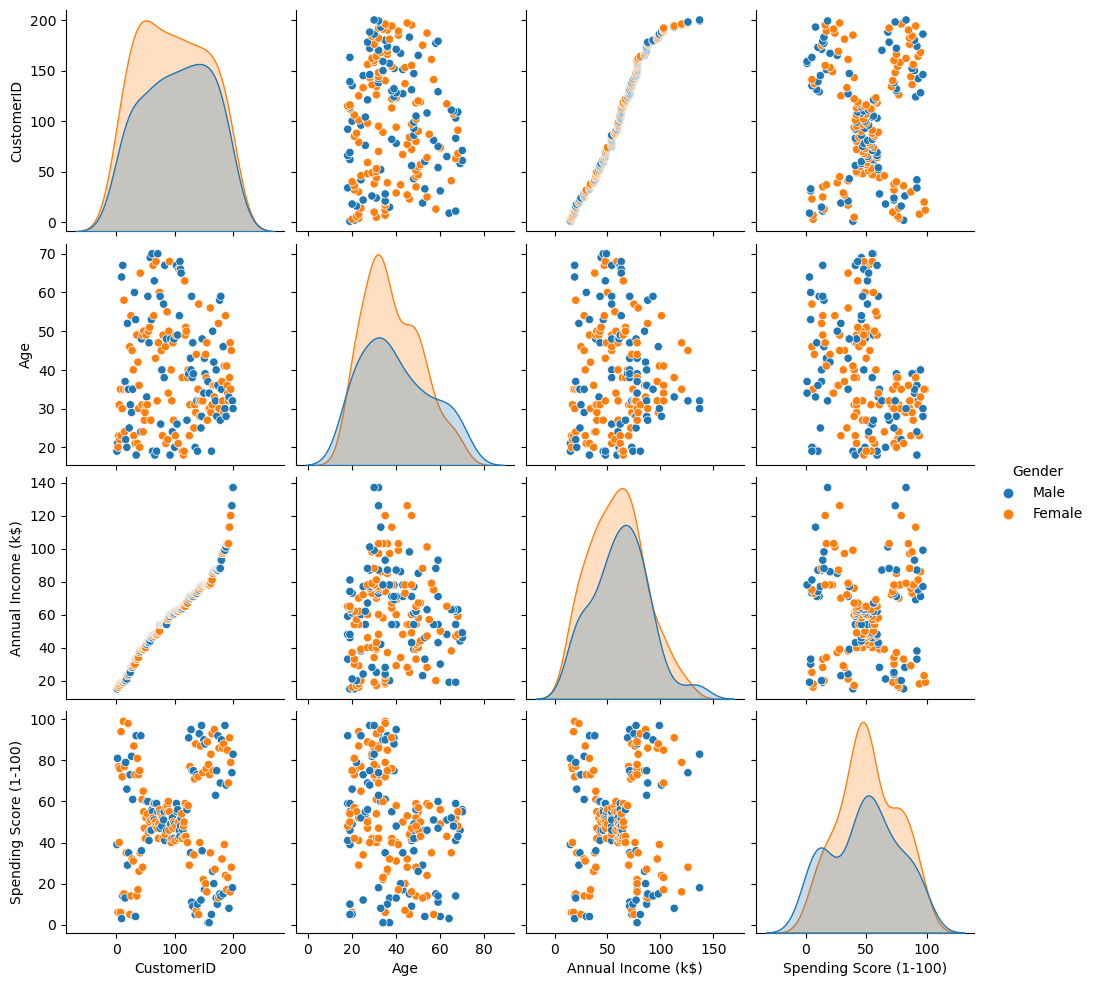

In [10]:
sns.pairplot(data = df, hue = 'Gender')

In [11]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)'].mean()

,Age,Annual Income (k$)
Gender,,
Female,38.098214,59.250000
Male,39.806818,62.227273


In [12]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

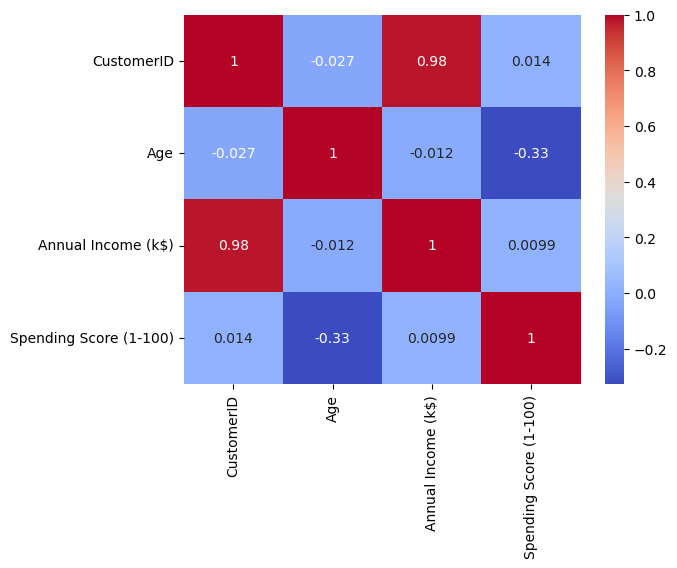

In [13]:
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm')

###  Clustering : Univariate, Bivariate and Multivariate 

In [14]:
clusers1 = KMeans(n_clusters= 3)
clusers1.fit(df[['Annual Income (k$)']])
clusers1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [15]:
df['income_clusters'] = clusers1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [16]:
df['income_clusters'].value_counts()

0    92
1    72
2    36
Name: income_clusters, dtype: int64

In [17]:
# represent the centroid 
clusers1.inertia_

23528.152173913055

In [18]:
inertia_score =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

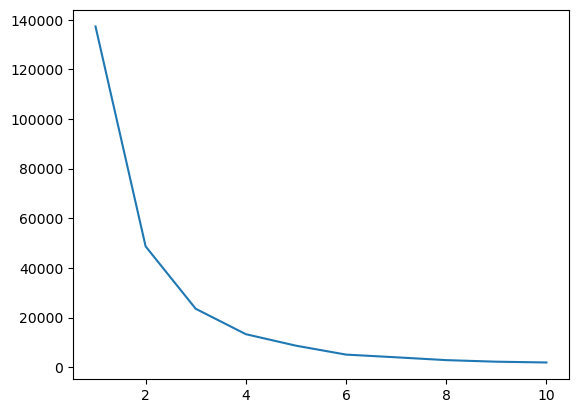

In [19]:
plt.plot(range(1,11),inertia_score)

In [20]:
df.groupby('income_clusters')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income_clusters,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


In [21]:
# Bivariate Clustering 
clusers2 = KMeans(n_clusters=5)
clusers2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and income cluster'] = clusers2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_clusters,Spending and income cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,3


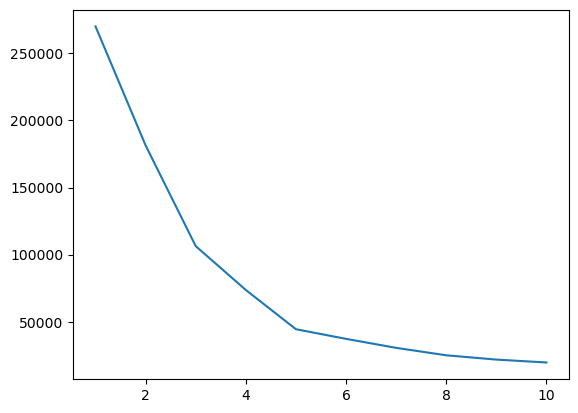

In [23]:
inertia_score2 =[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score2.append(kmeans2.inertia_)
    
plt.plot(range(1,11),inertia_score2)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

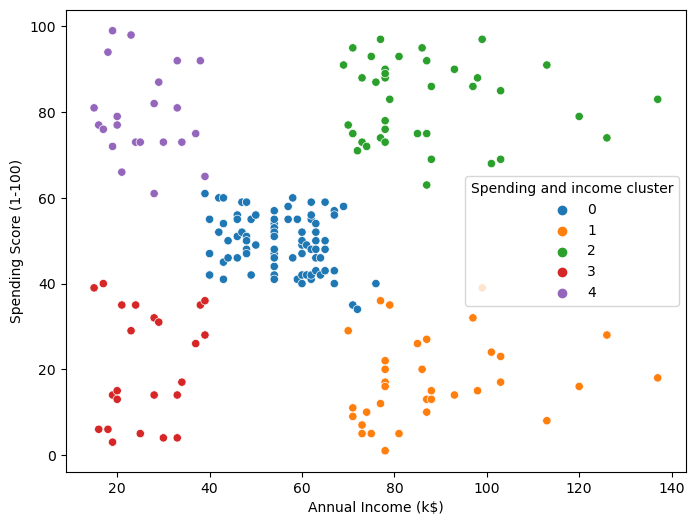

In [31]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x ='Annual Income (k$)' , y = 'Spending Score (1-100)' , hue = 'Spending and income cluster', palette= 'tab10')